In [1]:
%config IPCompleter.greedy=True
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib
import matplotlib.pyplot as plt

## PART B - Keras – High Level API [30 Marks]

The objective of Part B is to explore the problem of image classification when using a dataset a dataset that contains images of letters from A – J inclusive. A sample of some of the images are depicted in the image below.
We will be working with a modified version of the original dataset. Some pre-processing work has been completed on the dataset and it has also been normalized.

In [2]:
#From appendix of assignment brief
def loadData():
    with h5py.File('data/data.h5','r') as hf:
        print('List of arrays in this file: \n', hf.keys())
        allTrain = hf.get('trainData')
        allTest = hf.get('testData')
        npTrain = np.array(allTrain)
        npTest = np.array(allTest)
    print('Shape of the array dataset_1: \n', npTrain.shape)
    print('Shape of the array dataset_2: \n', npTest.shape)
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

trainX, trainY, testX, testY = loadData()
outputs = []

List of arrays in this file: 
 <KeysViewHDF5 ['testData', 'trainData']>
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [3]:
def visualiseOutput(history, results):
    print("\n")
    print("Test Loss: ", results[0])
    print("Test Accuracy: ", results[1])
    print("\n")
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
   
    plt.title('Training Loss and Accuracy')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('Epoch #')
    plt.legend(['train loss', 'val loss', 'train acc', 'val acc'], loc='lower left')
    plt.show()

In [4]:

'''
This base function will be used through this notebook to build keras NN.
I have decided to generalise the creation of networks to avoid substantial code duplication as well as 
to make it more readable.
This methos will take the list of layers to be created and will return compiled model.
Function will be used in parts i and ii.
'''
def buildModel(layersList):
    model = tf.keras.models.Sequential()
    model.add(layers.InputLayer(input_shape=(784,)))
    for layer in layersList:
        model.add(layers.Dense(layer["size"], activation=layer["activation"]))
        if layer["applyDropout"]:
            model.add(layers.Dropout(layer["dropRate"]))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [5]:
def executeModel(hidden):
    layers = []
    for layer in hidden:
        layers.append({"size": layer[0], "activation": tf.nn.relu, "applyDropout": layer[1], "dropRate": layer[2]})
    layers.append({"size": 10, "activation": tf.nn.softmax, "applyDropout": False, "dropRate": 0.3})
    model = buildModel(layers)
    history = model.fit(trainX, trainY, epochs=20, batch_size=256, validation_split=0.1, verbose=0)
    results = model.evaluate(testX, testY)
    outputs.append(results)
    return history, results

##### Part B (i)

The initial task for part 2 is to use Keras to build a SoftMax classifier. This will serve as a benchmark for the work below. You should be able to achieve an accuracy of approximately 85% on the test data. Specify a batch size of 256 when building your model.

17000/17000 [==============================] - 1s 46us/sample - loss: 0.5468 - accuracy: 0.8559


Test Loss:  0.5468080492440393
Test Accuracy:  0.8559412




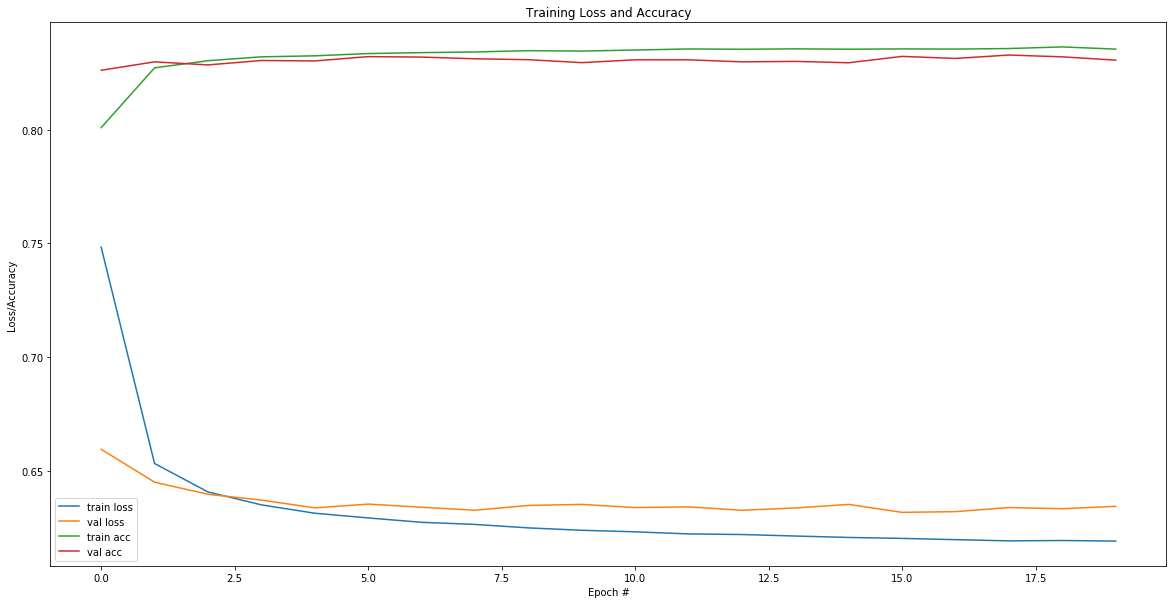

In [6]:
'''
Initial network consisting only of 1 Softmax layer
Given that there are letters A-J, there are 10 categories
'''
def initialTask():
    layers = []
    #input task for the model builder
    layers.append({"size": 10, "activation": tf.nn.softmax, "applyDropout": False, "dropRate": 0.0})
    model = buildModel(layers)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #capture history and results
    history = model.fit(trainX, trainY, epochs=20, batch_size=256, validation_split=0.1, verbose=0)
    results = model.evaluate(testX, testY)
    #visualise the outcome   
    visualiseOutput(history, results)
 

initialTask()

Next using Keras build a two layer fully-connected neural network with a single layer of ReLU activation neurons connected to a Softmax layer. Is there an improvement in accuracy over the SoftMax model?

17000/17000 [==============================] - 1s 48us/sample - loss: 0.3456 - accuracy: 0.9124


Test Loss:  0.34564276655325116
Test Accuracy:  0.91241175




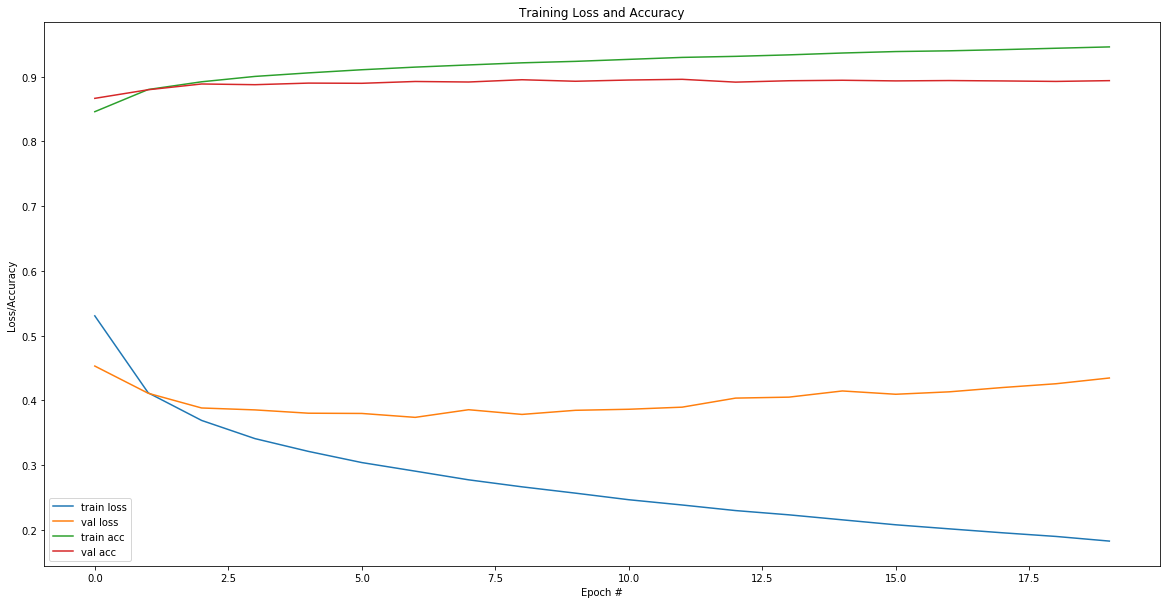

In [7]:
'''
Network consisting of 2 layers:
    1. 200 neuron Relu layer
    2. 10 neuron Softmax layer
'''
def twoLayers():
    layers = []
    #Prepare task for model builder
    layers.append({"size": 200, "activation": tf.nn.relu, "applyDropout": False, "dropRate": 0.0})
    layers.append({"size": 10, "activation": tf.nn.softmax, "applyDropout": False, "dropRate": 0.0})
    model = buildModel(layers)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #Capture results and history, verbose is off to save space
    #90/10 split between train and validation
    history = model.fit(trainX, trainY, epochs=20, batch_size=256, validation_split=0.1, verbose=0)
    results = model.evaluate(testX, testY)
    #Visualise   
    visualiseOutput(history, results)
 

twoLayers()

Examine the application of a deeper neural network to your problem (evaluate with 3, 4, 5 layers).

A comprehensive investigation of the network architecture is beyond the scope of this assignment. However, you should compare and contrast the performance of at least three different network configurations such as the following:

- L1 200 Neurons L2 Softmax
- L1 400 Neurons L2 200 Neurons L3 Softmax
- L1 600 Neurons L2 400 Neurons L3 200 Neurons L4 Softmax

In [8]:
'''
Reference: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
'''
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

17000/17000 [==============================] - 1s 58us/sample - loss: 0.4193 - accuracy: 0.9297
Executed model with 6 layers. 



Test Loss:  0.4192979374265603
Test Accuracy:  0.92970586




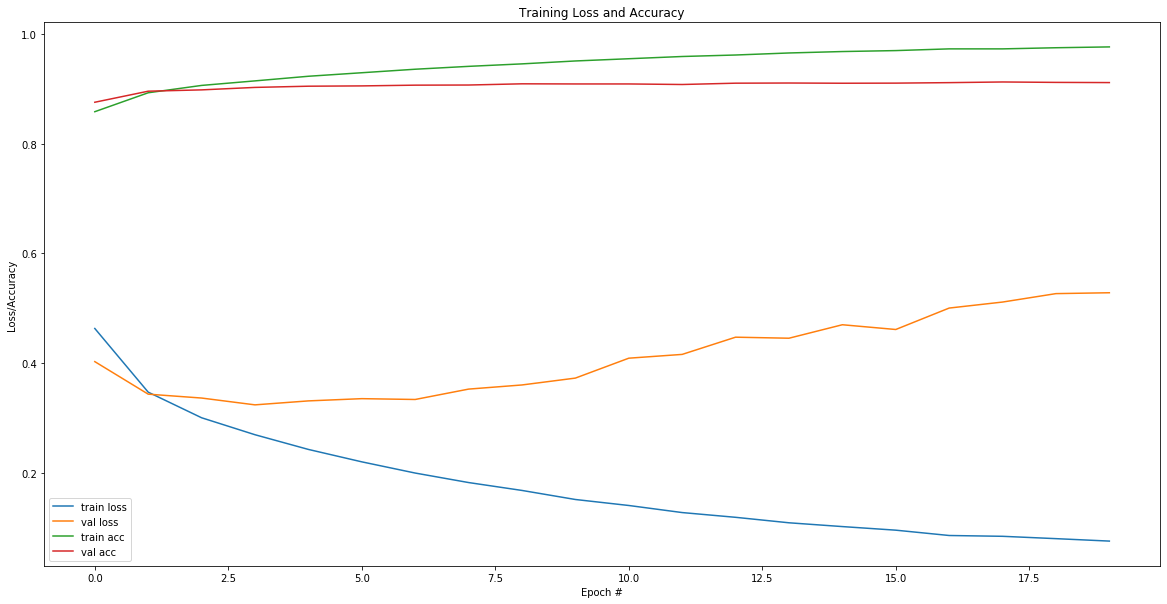

17000/17000 [==============================] - 1s 54us/sample - loss: 0.4388 - accuracy: 0.9279
Executed model with 5 layers. 



Test Loss:  0.43875493328737075
Test Accuracy:  0.9279412




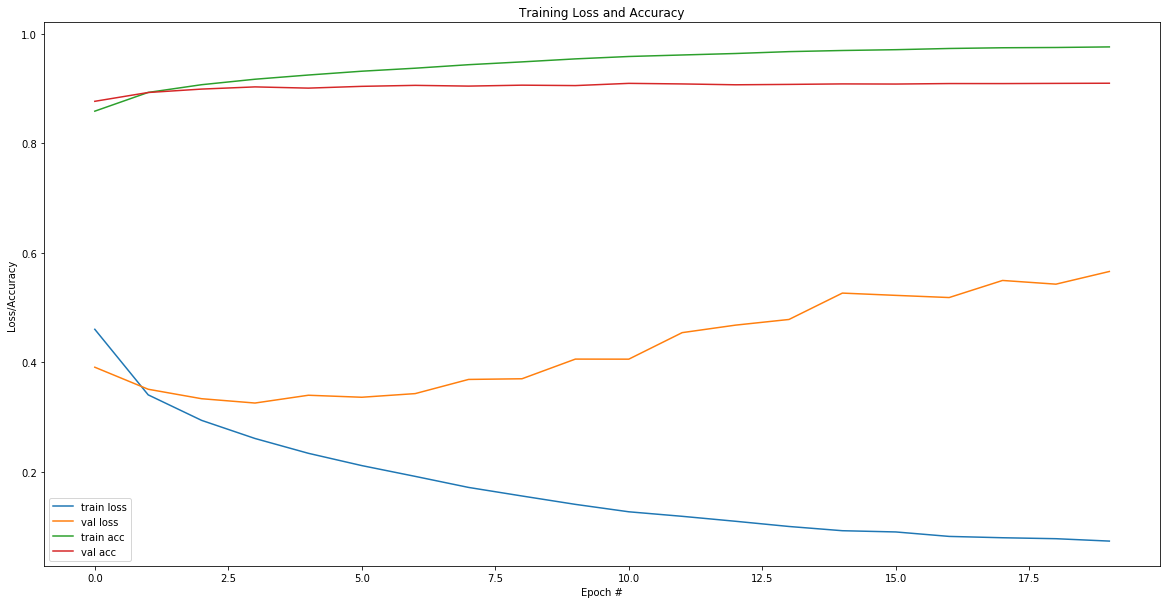

17000/17000 [==============================] - 1s 53us/sample - loss: 0.4583 - accuracy: 0.9288
Executed model with 4 layers. 



Test Loss:  0.45829670841570236
Test Accuracy:  0.92882353




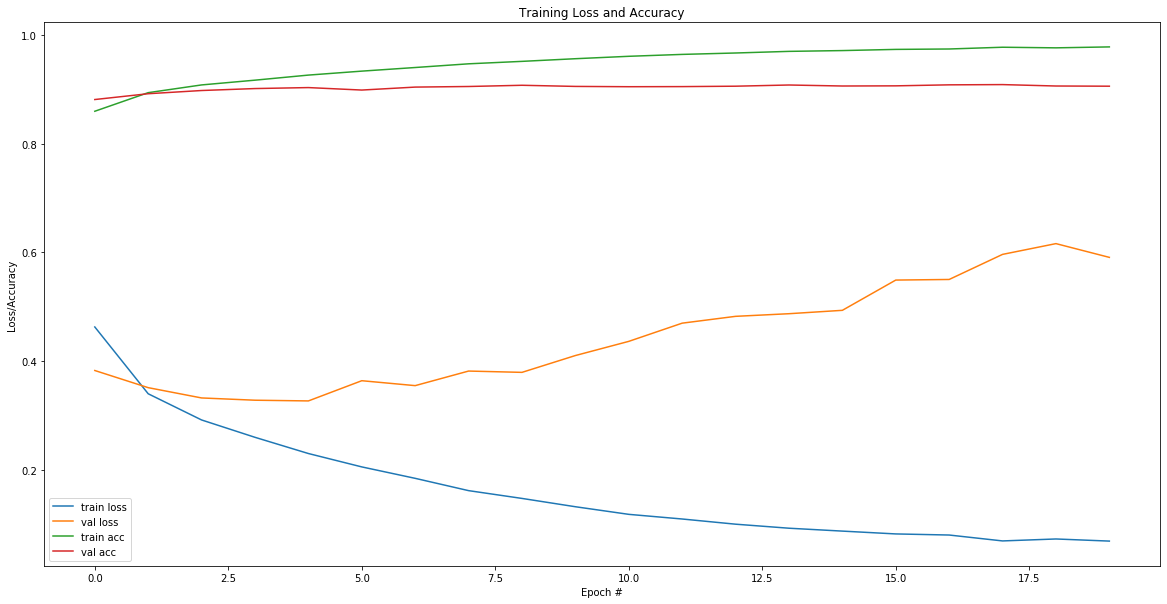

In [ ]:
def executeModels():
    tasks = []
    labels = []
    losses = []
    accuracies = []
    tasks.append([[1000, False, 0], [800, False, 0], [600, False, 0], [400, False, 0], [200, False, 0]])
    tasks.append([[800, False, 0], [600, False, 0], [400, False, 0], [200, False, 0]])
    tasks.append([[600, False, 0], [400, False, 0], [200, False, 0]])
    tasks.append([[400, False, 0], [200, False, 0]])
    tasks.append([[200, False, 0]])
    for task in tasks:
        h, r = executeModel(task)
        networkLength = len(task) + 1
        print("Executed model with {} layers. \n".format( networkLength ))
        labels.append(str(networkLength) + " Layers")
        losses.append(round(r[0], 4))
        accuracies.append(round(r[1], 4))
        #Visualise   
        visualiseOutput(h, r)


    fig, ax = plt.subplots(figsize=(20,10))
    x = np.arange(len(labels))
    width = 0.35
    rects1 = ax.bar(x - width/2, losses, width, label='Loss')
    rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy')
    ax.set_ylabel('Loss / Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    autolabel(rects1, ax)
    autolabel(rects2, ax)
    
    #plt.figure(figsize=(20,10))
    plt.show()
    
executeModels()
